<a href="https://colab.research.google.com/github/Samarjeet-singh-chhabra/EDA-Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Samarjeet_Singh_Chhabra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement


Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.

Explore and analyze the data to discover important factors that govern the bookings.

#**Starting with cheking and cleaning**

##Adding required libraries.

In [40]:
# Importing Libraries
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


##Adding the CSV file




In [ ]:
#accessing it by link
url = "https://drive.google.com/file/d/1EGYfR6Q0LIN7DWJg9rp0WMwVcW9F9UG4/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

## Reading csv file 

In [ ]:
#making hotels_df the dataframe name
hotels_df = pd.read_csv(url) 

##Exploring Dataset

### Data Description:

1. **hotel** : *Hotel(Resort Hotel or City Hotel)* 

2. **is_canceled** : *Value indicating if the booking was canceled (1) or not (0)*

3. **lead_time** :* Number of days that elapsed between the entering date of the booking into the PMS and the arrival date*

4. **arrival_date_year** : *Year of arrival date*

5. **arrival_date_month** : *Month of arrival date*

6. **arrival_date_week_number** : *Week number of year for arrival date*

7. **arrival_date_day_of_month** : *Day of arrival date*

8. **stays_in_weekend_nights** : *Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel*

9. **stays_in_week_nights** : *Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel*

10. **adults** : *Number of adults*

11. **children** : *Number of children*

12. **babies** : *Number of babies*

13. **meal** : *Type of meal booked. Categories are presented in standard hospitality meal packages:*

14. **country** : *Country of origin.`*

15. **market_segment** : *Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”*

16. **distribution_channel** : *Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”*

17. **is_repeated_guest** : *Value indicating if the booking name was from a repeated guest (1) or not (0)*

18. **previous_cancellations** : *Number of previous bookings that were cancelled by the customer prior to the current booking*

19. **previous_bookings_not_canceled** : *Number of previous bookings not cancelled by the customer prior to the current booking*

20. **reserved_room_type** : *Code of room type reserved. Code is presented instead of designation for anonymity reasons.*

21. **assigned_room_type** : *Code for the type of room assigned to the booking.* 

22. **booking_changes** : *Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation*

23. **deposit_type** : *Indication on if the customer made a deposit to guarantee the booking.*

24. **agent** : *ID of the travel agency that made the booking*

25. **company** : *ID of the company/entity that made the booking or responsible for paying the booking.* 

26. **days_in_waiting_list** : *Number of days the booking was in the waiting list before it was confirmed to the customer*

27. **customer_type** : *Type of booking, assuming one of four categories*


28. **adr** : *Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying night*

29. **required_car_parking_spaces** : *Number of car parking spaces required by the customer*

30. **total_of_special_requests** :* Number of special requests made by the customer (e.g. twin bed or high floor)*

31. **reservation_status** : *Reservation last status, assuming one of three categories*
* Canceled – booking was canceled by the customer
* Check-Out – customer has checked in but already departed
* No-Show – customer did not check-in and did inform the hotel of the reason why





32. **reservation_status_date** : *Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel*

In [ ]:
#Checking the shape of the dataset
hotels_df.shape

In [ ]:
#Checking basic information of all columns of the dataset
hotels_df.info()

In [ ]:
#looking at the min, max values,mean values etc. NAN values for mean,25% ,50%,75%,max indicates those are categorical columns.
hotels_df.describe()

In [ ]:
#printing first 5 rows of dataset
hotels_df.head()

In [ ]:
#printing last 5 rows of dataset
hotels_df.tail()

## Checking for Types of Variable in some columns(unique values)


# Cleaning the Dataset

In [32]:
#creating copy of dataframe 
hotels_df_copy =hotels_df.copy()

In [19]:
# Removing duplicate rows if any
hotels_df_copy[hotels_df_copy.duplicated()].shape 

(31994, 32)

In [31]:
# Droping duplicate values 
hotels_df_copy.drop_duplicates(inplace = True)   
hotels_df_copy.shape

(87333, 30)

In [21]:
# cheking  for null values 
hotels_df.isna().sum(axis = 0)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## Agent, company, children and country are having most null values, Cheking on them and fixing them.

In [ ]:
# Cheking content in agent column
agent_list = hotels_df['agent'].tolist()
list(agent_list)

In [ ]:
# Cheking content in company column
company_list = hotels_df['company'].tolist()
list(company_list)

In [ ]:
# Cheking content in country column
country_list = hotels_df['country'].tolist()
list(country_list)

In [ ]:
# Cheking content in country column
children_list = hotels_df['children'].tolist()
list(children_list)

##fixing nulls in children, country, agent and company.


In [33]:
# Handling null values 
hotels_df_copy['children'].fillna(0, inplace = True)
hotels_df_copy['country'].fillna('Others', inplace = True)
hotels_df_copy['agent'].fillna(0, inplace = True)

# Deleting two Columns which are not useful
hotels_df_copy.drop(labels = ['previous_bookings_not_canceled','company'], axis=1, inplace = True)

In [ ]:
# checking if their any null values in df
hotels_df_copy.isnull().sum()

##Converting columns datatype to required datatypes.

In [36]:
# Converting datatype from float to int.
hotels_df_copy[['children', 'agent']] = hotels_df_copy[['children', 'agent']].astype('int64')

In [41]:
# changing datatype of column 'reservation_status_date' to data_type.
hotels_df_copy['reservation_status_date'] = pd.to_datetime(hotels_df_copy['reservation_status_date'], format = '%Y-%m-%d')

## Adding important columns.

In [43]:
# Adding total days of stay in hotels.
hotels_df_copy['total_stay'] = hotels_df_copy['stays_in_weekend_nights']+hotels_df_copy['stays_in_week_nights']

# Adding total number of guest as column.
hotels_df_copy['total_people'] = hotels_df_copy['adults']+hotels_df_copy['children']+hotels_df_copy['babies']

#**Final dataset check before finding insights.**

In [ ]:
hotels_df_copy.info()

#**Starting getting insights from the data**

**Now we will get valuable and meaningful insights out of our dataframe while keeping the problem statement in mind.**


##Types of hotel and there frequencies and reasonaning.

In [51]:
#Finding number of unique values and there frequency in data set.
hotels_df_copy['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

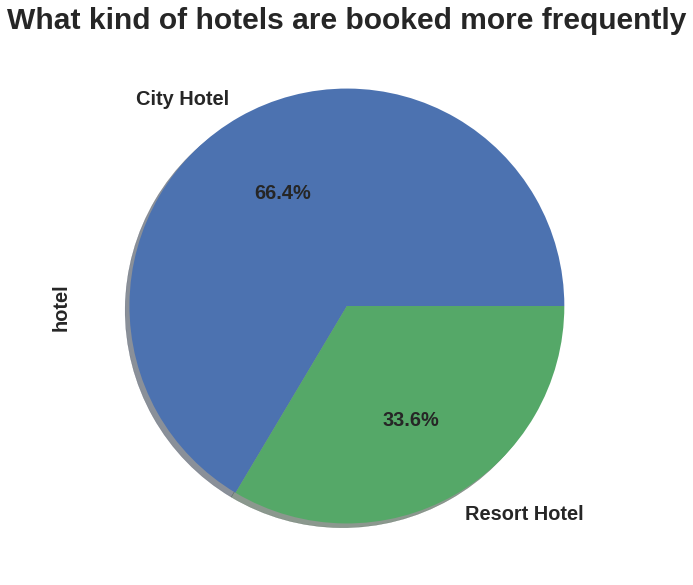

In [114]:
#plotting this insight.
hotels_df_copy['hotel'].value_counts().plot(kind='pie', figsize=(15,10), title='What kind of hotels are booked more frequently', autopct='%1.1f%%' , fontsize=20 , shadow=True)

we can conclude city hotels are more booked by customers

[Text(0.5, 1.0, 'Mean ADR of the hotel types')]

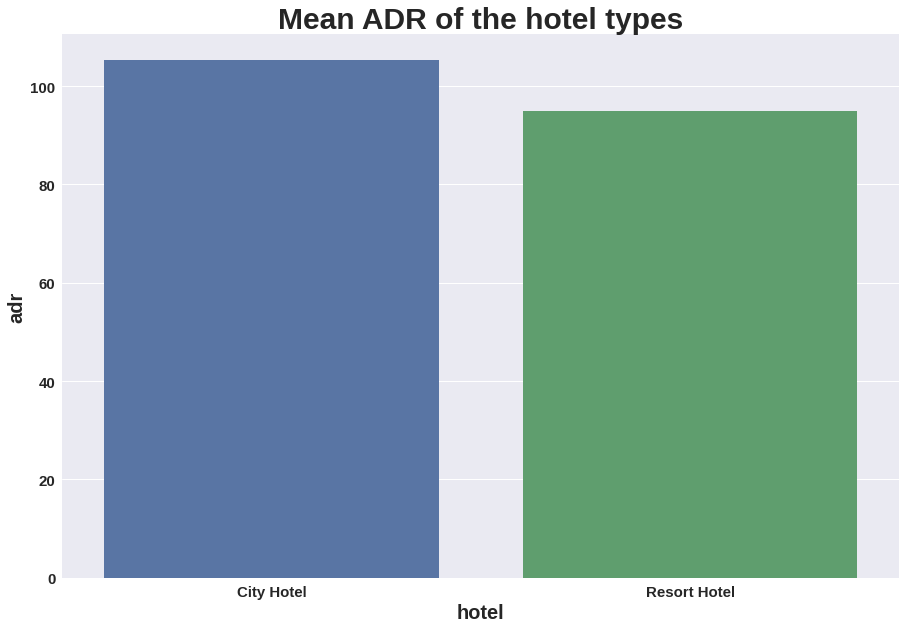

In [145]:
#comparing hotel type with there adr(total revenue)
hotel_type_adr= hotels_df_copy.groupby(['hotel'])['adr'].mean().reset_index()

# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 30
plt.rcParams["axes.titleweight"] = 'bold'
plt.figure(figsize=(15,10))

#ploting the data
sns.barplot(x=hotel_type_adr['hotel'],y=hotel_type_adr['adr'],data=hotel_type_adr).set(title='Mean ADR of the hotel types')


So , we can conclude that as city hotels are booked more(66.4%) and resort hotels are booked less(33.6%) but city hotel only have 52.6% ADR and resort hotel has 47.41% ADR share in total ADR combined, we can conclude that city hotels are more cheaper.